In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
# from sklearn.nn import MLPRegressor # multi linear progressor

In [16]:
# 데이터 준비

iris = load_iris()
print(np.unique(iris['target']), iris['target_names']) # 세 종류의 데이터
pd.DataFrame(iris['data'], columns=iris['feature_names']).tail()

X = iris['data'][:100, :] # 두 종류의 데이터만 추출
y = iris['target'][:100] # 0 or 1
y = np.where(y == 0, -1, 1) # y가 0이라면 -1 아니라면 1 # [0 or 1] -> [-1 or 1]

[0 1 2] ['setosa' 'versicolor' 'virginica']


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [24]:
# 알고리즘 구현

def net_input(X, w):
    result = np.dot(X, w[1:]) # x와 w 곱하기 # w[0] : bias(절편) -> 절편으로 직선 그래프 움직이기 
    return result

def predict(X, w):
    input = net_input(X,w)
    return np.where(input >= 0, 1, -1) # 그렇다면 1 아니라면 -1 # activation

def fit(X, y, eta, n_iter): # eta : learning-rate (오차 적용비율, 가중치 조정비율)
    w = np.zeros(X.shape[1] + 1)  # 전체 가중치 개수 : 속성 개수(컬럼 개수) + 1(1은 절편값(bias) 때문에) 
    
    errors = [] # 밑의 반복문의 에러 개수 찾기
    
    for _ in range(n_iter): # 반복 학습 몇 번 할 지! -> w1x1+...+wnxn # 반복만 하면 되서 임시변수 _ 로 넣는다 # 만약 밑의 작업이 100번이 되었다고 하고 이 작업을 10번 반복이라고 했다면,  총 1000개이다.
        error = 0
        for xi, yi in zip(X, y): # X,y로부터 한 행의 데이터 꺼내기(한 건)
            pv = predict(xi, w)
            update = eta * (yi - pv) # 값은 하나인데 xi곱하면 여러개가 되어서
            w[1:] += update * xi # 원래 식이 eta(yi-pv)xi라서 # update 계속 추가
            w[0] += update # update만
            error += int(update != 0 ) #오류의 개수를 누적 # (update != 0) # update가 0이 아닌 것은 오차가 있다. -> yi와 pv가 다른지 보는 것
        errors.append(error)
        
    return w, errors 
   

In [31]:
w, errors = fit(X,y, eta=0.1, n_iter=10) # 학습률 10%씩 반영 -> 조금씩 조정하겠다. # 10번 반복 

print(w)
print(errors)

10
[-0.2  -0.26 -0.82  1.04  0.44]
[2, 2, 1, 0, 0, 0, 0, 0, 0, 0]


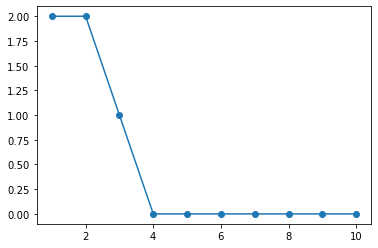

In [28]:
plt.plot(range(1, len(errors) + 1), errors, marker='o') # 0부터 간 게 아니라 1부터 가서 1 더하기
plt.show()

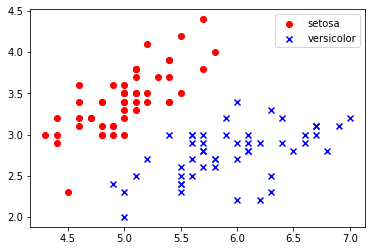

In [30]:
plt.scatter(X[:50, 0], X[:50, 1],color ='red', marker='o', label=iris['target_names'][0]) # 네 가지 속성 중 0번째, 1번째 속성 #?
plt.scatter(X[50:, 0], X[50:, 1],color ='blue', marker='x', label=iris['target_names'][1])
plt.legend()
plt.show()